# Baseline Classifier Test

Provides evidence that an SVM should be used over a Random Forest when operating on a bag of words representation.

In [4]:
# Make common scripts visible
import sys
sys.path.append('../common/')

import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from term_document_matrix import TermDocumentMatrixCreator
from experiments_common import load_reutuers_data
from classification import run_support_vector_classifier


# To run a Random Forest on bag of words
def run_random_forest(train_x, train_y, test_x):
    tdm_creator = TermDocumentMatrixCreator(train_x)
    train_tdm = tdm_creator.create_term_document_matrix(train_x)
    test_tdm = tdm_creator.create_term_document_matrix(test_x)
    
    classifier = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
    classifier.fit(train_tdm, train_y)
    predict_y = classifier.predict(test_tdm)
    
    return predict_y


# Load the RCV1 data
np.random.seed(42)
(training_data_dict,
 train_x, train_y,
 test_x, test_y,
 topic_code_to_prior_prob) = load_reutuers_data('data/rcv1_baseline.csv')

svc_results = []
rf_results = []

# Run the classifiers at each training set size
train_sizes = [12, 60, 120, 600, 1200, 6000, 12000, 60000]
for train_size in train_sizes:
    
    # Random Forest
    predict_y = run_random_forest(train_x[:train_size], train_y[:train_size], test_x)
    micro = f1_score(test_y, predict_y, average='micro')
    rf_results.append(micro)
    
    # Support Vector Machine
    predict_y = run_support_vector_classifier(train_x[:train_size], train_y[:train_size], test_x, C=0.01)
    micro = f1_score(test_y, predict_y, average='micro')
    svc_results.append(micro)

Prior class probabilities are ...
Topic Code: GCRIM, Probability: 0.3294559099437148
Topic Code: E11, Probability: 0.09139167862266857
Topic Code: GVOTE, Probability: 0.11830923739101644
Topic Code: GHEA, Probability: 0.054044807416399956
Topic Code: GREL, Probability: 0.02504138616046794
Topic Code: GSPO, Probability: 0.38175698046573225

Size of test set is 18122

Number of words in vocabulary: 1344
Number of words in vocabulary: 1344
Number of words in vocabulary: 3978
Number of words in vocabulary: 3978
Number of words in vocabulary: 5899
Number of words in vocabulary: 5899
Number of words in vocabulary: 14258
Number of words in vocabulary: 14258
Number of words in vocabulary: 20275
Number of words in vocabulary: 20275
Number of words in vocabulary: 43998
Number of words in vocabulary: 43998
Number of words in vocabulary: 59852
Number of words in vocabulary: 59852
Number of words in vocabulary: 121526
Number of words in vocabulary: 121526


Now plot the results.

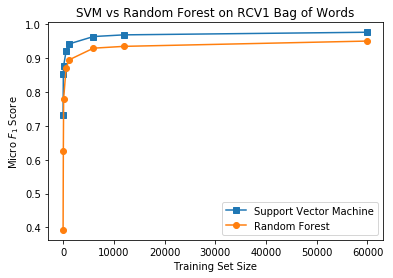

In [8]:
import matplotlib.pyplot as plt

train_sizes = [12, 60, 120, 600, 1200, 6000, 12000, 60000]

plt.title('SVM vs Random Forest on RCV1 Bag of Words')
plt.ylabel('Micro $F_1$ Score')
plt.xlabel('Training Set Size')
plt.plot(train_sizes, svc_results,'-s', label='Support Vector Machine')
plt.plot(train_sizes, rf_results, '-o', label='Random Forest')
plt.legend(loc='lower right')
plt.savefig('rf_vs_svm_bow.pdf', bbox_inches='tight')
plt.show()